<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/AI_W11_FRI_14_04_CNN_CIFA10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.datasets import cifar10
from keras.saving.legacy.save import load_model
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
Y_test.shape

(10000, 1)

In [10]:
X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X_test.astype('float32')
X_test = X_test/255

In [11]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, 10) #chỉ nên chạy 1 lần(nếu chạy tiếp sẽ tăng thêm 10)
Y_test = to_categorical(Y_test, 10)

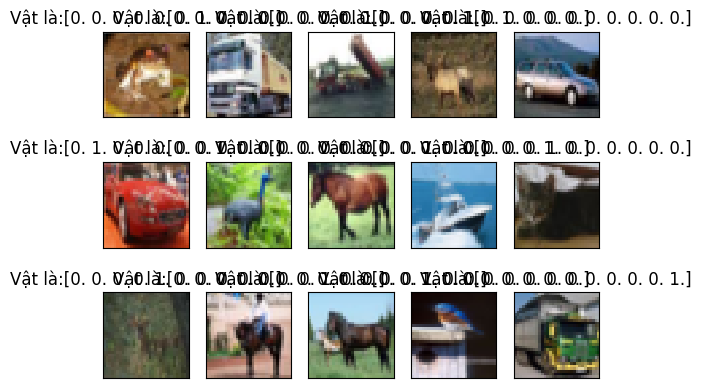

In [13]:
from matplotlib import pyplot as plt

for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout
  plt.imshow(X_train[i],cmap='gray',
             interpolation='none')
  plt.title('Vật là:{}'.format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [15]:
from keras import Sequential, Model
from keras import optimizers
from keras import losses
from keras.layers import Activation,Dropout,Dense,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam, SGD
import numpy as np

batch_size = 64
epochs = 20
classes = 10

model = Sequential()
#Tích chập 1
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#Tích chập 2
model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#ANN
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

sgd = SGD(lr = 0.1,decay = 1e-6,momentum = 0.9,nesterov = True)
model.compile(loss='categorical_crossentropy',optimizer = SGD(), metrics = ['accuracy'])
train = model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1)
test_loss, test_acc = model.evaluate(X_test,Y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 2.2152 - accuracy: 0.1660
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 1.9848 - accuracy: 0.2756
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 1.7949 - accuracy: 0.3482
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 1.6574 - accuracy: 0.3947
Epoch 5/20
782/782 [==============================] - 5s 7ms/step - loss: 1.5608 - accuracy: 0.4309
Epoch 6/20
782/782 [==============================] - 6s 7ms/step - loss: 1.4836 - accuracy: 0.4592
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 1.4252 - accuracy: 0.4839
Epoch 8/20
782/782 [==============================] - 6s 7ms/step - loss: 1.3750 - accuracy: 0.5042
Epoch 9/20
782/782 [==============================] - 5s 7ms/step - loss: 1.3290 - accuracy: 0.5211
Epoch 10/20
782/782 [==============================] - 6s 7ms/step - loss: 1.2917 - accuracy: 0.5379

In [16]:
model.save('CNN_CIFA10.h5')  #lưu file

In [17]:
model10 = load_model('CNN_CIFA10.h5')

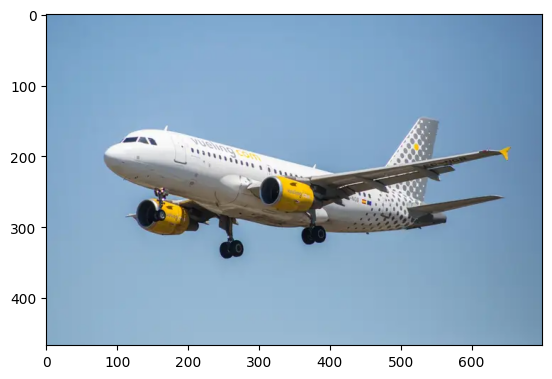

In [26]:
img = plt.imread('airplane.jpg')
plt.imshow(img)
plt.show()

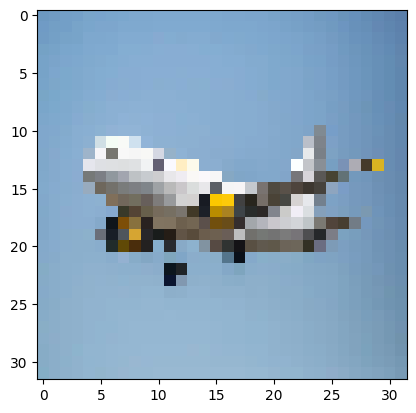

1/1 [==============================] - 0s 22ms/step
0
Label:  airplane


In [27]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('airplane.jpg', target_size = (32,32))  #target_size: chỉnh kích thước ảnh mong muốn

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = img_to_array(img)
img = img.reshape(1, 32,32,3)
img = img.astype('float32')
img = img / 255

plt.imshow(img.reshape(32,32,3))
plt.show()

matrix = np.argmax(model.predict(img),axis = -1)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
temp = matrix[0]
print(temp)
print("Label: ", classes[temp])